Part 2i) Both alpha and beta using 1 and 0.5

Final x1: 5.9999998807907104
Final x2: 6.000000089406967


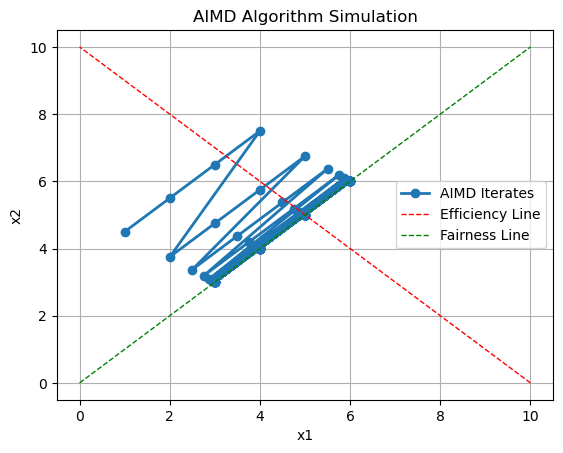

In [1]:
import numpy as np
import matplotlib.pyplot as plt

ITERATESMAX = 100 # You can adjust this value as needed
C = 10 # Adjust Capacity value as needed
alpha = 0.1 # Adjust alpha value as needed
exponent1 = 2 # Adjust exponent1 value as needed
exponent2 = 0.5 # Adjust exponent2 value as needed

#user x1 and x2 and their cwnd
x1 = 2
x2 = 9
alpha1 = 0
alpha2 = 0
beta1 = 0
beta2 = 0

alpha = 1
beta = 0.5

x1_values = np.zeros(ITERATESMAX)
x2_values = np.zeros(ITERATESMAX)
for i in range(ITERATESMAX):
    # if (x1 + x2 <= C + alpha1 + alpha2): # when alpha is large it pushes the const boundary out
    if (x1 + x2 <= C):
        # Additive increase phase
        # print('Additive I')
        alpha1 = alpha #* np.power(x1, exponent1)
        alpha2 = alpha #* np.log(x2 + 1)
        x1 = x1 + alpha1
        x2 = x2 + alpha2
    else:
        # Simulate network condition (for example, congestion)
        # print('Multiplicative D')
        # beta1 = exponent1
        # beta2 = exponent2
        beta1 = beta
        beta2 = beta
        x1 = x1 * beta1
        x2 = x2 * beta2
        # pause(1)
    # Store values in arrays
    x1_values[i] = x1
    x2_values[i] = x2

# Display the final values
print("Final x1:", x1)
print("Final x2:", x2)

# Plot x1 against x2
plt.plot(x1_values, x2_values, '-o', linewidth=2)
plt.plot([C, 0], [0, C], 'r--', linewidth=1, label='Efficiency Line')
# plt.plot([C + 2 * alpha, 0], [0, C + 2 * alpha], 'b--', linewidth=2)
plt.plot([0, C], [0, C], 'g--', linewidth=1, label='Fairness Line')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('AIMD Algorithm Simulation')
plt.legend(['AIMD Iterates', 'Efficiency Line', 'Fairness Line'], loc='best')
plt.grid(True)
plt.show()

Part 2ii) Alpha and Beta different for both users

Final x1: 6.158294803076313
Final x2: 1.2857142857156987


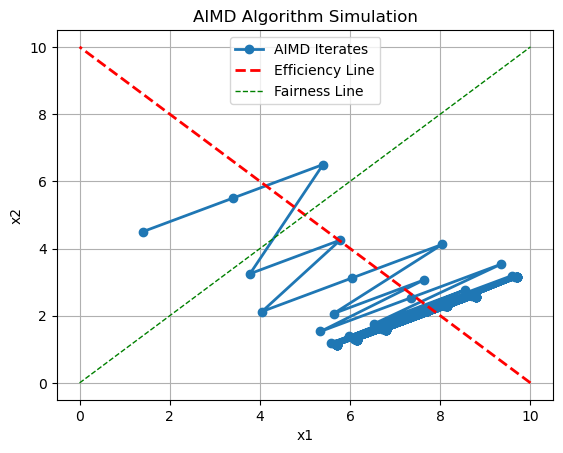

In [2]:
ITERATESMAX = 100 # You can adjust this value as needed
C = 10 # Adjust Capacity value as needed
alpha = 0.1 # Adjust alpha value as needed
exponent1 = 2 # Adjust exponent1 value as needed
exponent2 = 0.5 # Adjust exponent2 value as needed

#user x1 and x2 and their cwnd
x1 = 2
x2 = 9
alpha1 = 2
alpha2 = 0
beta1 = 0.7
beta2 = 0

base_alpha = 1
base_beta = 0.5

x1_values = np.zeros(ITERATESMAX)
x2_values = np.zeros(ITERATESMAX)
for i in range(ITERATESMAX):
    # if (x1 + x2 <= C + alpha1 + alpha2): # when alpha is large it pushes the const boundary out
    if (x1 + x2 <= C):
        # Additive increase phase
        # print('Additive I')
        # alpha1 = alpha #* np.power(x1, exponent1)
        alpha2 = base_alpha #* np.log(x2 + 1)
        x1 = x1 + alpha1
        x2 = x2 + alpha2
    else:
        # Simulate network condition (for example, congestion)
        # print('Multiplicative D')
        # beta1 = exponent1
        # beta2 = exponent2
        # beta1 = beta1
        beta2 = base_beta
        x1 = x1 * beta1
        x2 = x2 * beta2
        # pause(1)
    # Store values in arrays
    x1_values[i] = x1
    x2_values[i] = x2

# Display the final values
print("Final x1:", x1)
print("Final x2:", x2)

# Plot x1 against x2
plt.plot(x1_values, x2_values, '-o', linewidth=2)
plt.plot([C, 0], [0, C], 'r--', linewidth=2, label='Efficiency Line')
# plt.plot([C + 2 * alpha, 0], [0, C + 2 * alpha], 'b--', linewidth=2, label='Efficiency Line')
plt.plot([0, C], [0, C], 'g--', linewidth=1, label='Fairness Line')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('AIMD Algorithm Simulation')
plt.legend(['AIMD Iterates', 'Efficiency Line','Fairness Line'], loc='best')
plt.grid(True)
plt.show()

Part 2iii) Make Alpha and Beta functions of congestion window

Final x1: 2.217181874174016
Final x2: 7.83740917571085


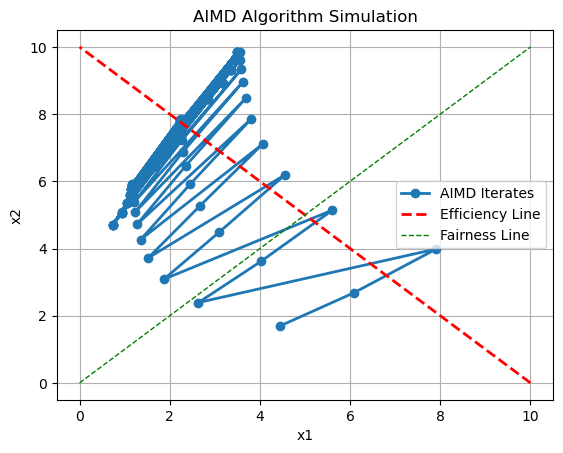

In [5]:
ITERATESMAX = 100 # You can adjust this value as needed
C = 20 # Adjust Capacity value as needed
alpha = 0.1 # Adjust alpha value as needed
exponent1 = 1/3 # Adjust exponent1 value as needed
exponent2 = 0.6 # Adjust exponent2 value as needed

#user x1 and x2 and their cwnd and threshold
thresh = 13
x1 = 5
x2 = 2
alpha1 = 2
alpha2 = 0
beta1 = 0.7
beta2 = 0

base_alpha = 1
base_beta = 0.5

x1_values = np.zeros(ITERATESMAX)
x2_values = np.zeros(ITERATESMAX)
for i in range(ITERATESMAX):
    # if (x1 + x2 <= C + alpha1 + alpha2): # when alpha is large it pushes the const boundary out
    if (x1 + x2 <= thresh):
        if (x1 + x2 <= C):
            # Additive increase phase
            # print('Additive I')
            alpha1 = 1
            # alpha2 = base_alpha * np.power(x2, exponent2)
            alpha2 = 1
            x1 = x1 + alpha1
            x2 = x2 + alpha2
        elif (x1 + x2 > C):
            # Simulate network condition (for example, congestion)
            # print('Multiplicative D')
            beta1 = 0.5
            beta2 = 0.5
            # beta1 = beta1
            # beta2 = base_beta
            x1 = x1 * beta1
            x2 = x2 * beta2
            # pause(1)
    elif (x1 + x2 > thresh):
        if (x1 + x2 <= C):
            # Additive increase phase
            # print('Additive I')
            alpha1 = base_alpha * np.log(x1+1)
            # alpha2 = base_alpha * np.power(x2, exponent2)
            alpha2 = base_alpha * np.log(x2 + 1)
            x1 = x1 + alpha1
            x2 = x2 + alpha2
        elif (x1 + x2 > C):
            # Simulate network condition (for example, congestion)
            # print('Multiplicative D')
            beta1 = base_beta * np.log(x1+1)
            beta2 = base_beta * np.log(x2+1)
            # beta1 = beta1
            # beta2 = base_beta
            x1 = x1 * 1/beta1
            x2 = x2 * 1/beta2
            # pause(1)
    # Store values in arrays
    x1_values[i] = x1
    x2_values[i] = x2

# Display the final values
print("Final x1:", x1)
print("Final x2:", x2)

# Plot x1 against x2
plt.plot(x1_values, x2_values, '-o', linewidth=2)
plt.plot([C, 0], [0, C], 'r--', linewidth=2, label='Efficiency Line')
# plt.plot([C + 2 * base_alpha, 0], [0, C + 2 * base_alpha], 'b--', linewidth=2, label='Efficiency Line')
# plt.plot([0, max(x1_values, x2_values)], [0, max(x1_values, x2_values)], 'b--', linewidth=2, label='Convergence Line')
plt.plot([0, C], [0, C], 'g--', linewidth=1, label='Fairness Line')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('AIMD Algorithm Simulation')
plt.legend(['AIMD Iterates', 'Efficiency Line', 'Fairness Line'], loc='best')
plt.grid(True)
plt.show()